In [2]:
# importar e visualizar os dados

import pandas as pd

dados = pd.read_csv("Telco_Recent.csv")
dados = dados.drop(columns=['Unnamed: 0', 'gender', 'PhoneService', 'MultipleLines'])
display(dados)

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Category
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,baixo
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,medio
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,baixo
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,medio
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,medio
7028,0,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,alto
7029,0,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,baixo
7030,1,Yes,No,4,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,baixo


In [3]:
# transformando os valores

mod = {
    'No internet service': 0,
    'No': 1,
    'Yes': 2
}
mod2 = {
    'No': 0,
    'Yes': 1
}
dados['StreamingTV'] = dados['StreamingTV'].map(mod)
dados['StreamingMovies'] = dados['StreamingMovies'].map(mod)
dados['OnlineBackup'] = dados['OnlineBackup'].map(mod)
dados['DeviceProtection'] = dados['DeviceProtection'].map(mod)
dados['TechSupport'] = dados['TechSupport'].map(mod)
dados['OnlineSecurity'] = dados['OnlineSecurity'].map(mod)
dados['Partner'] = dados['Partner'].map(mod2)
dados['Dependents'] = dados['Dependents'].map(mod2)
dados['PaperlessBilling'] = dados['PaperlessBilling'].map(mod2)
dados['Contract'] = dados['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
dados['TotalCharges_Category'] = dados['TotalCharges_Category'].map({'baixo': 0, 'medio': 1, 'alto': 2})
dados = pd.get_dummies(dados, columns=['InternetService', 'PaymentMethod'], drop_first=True)

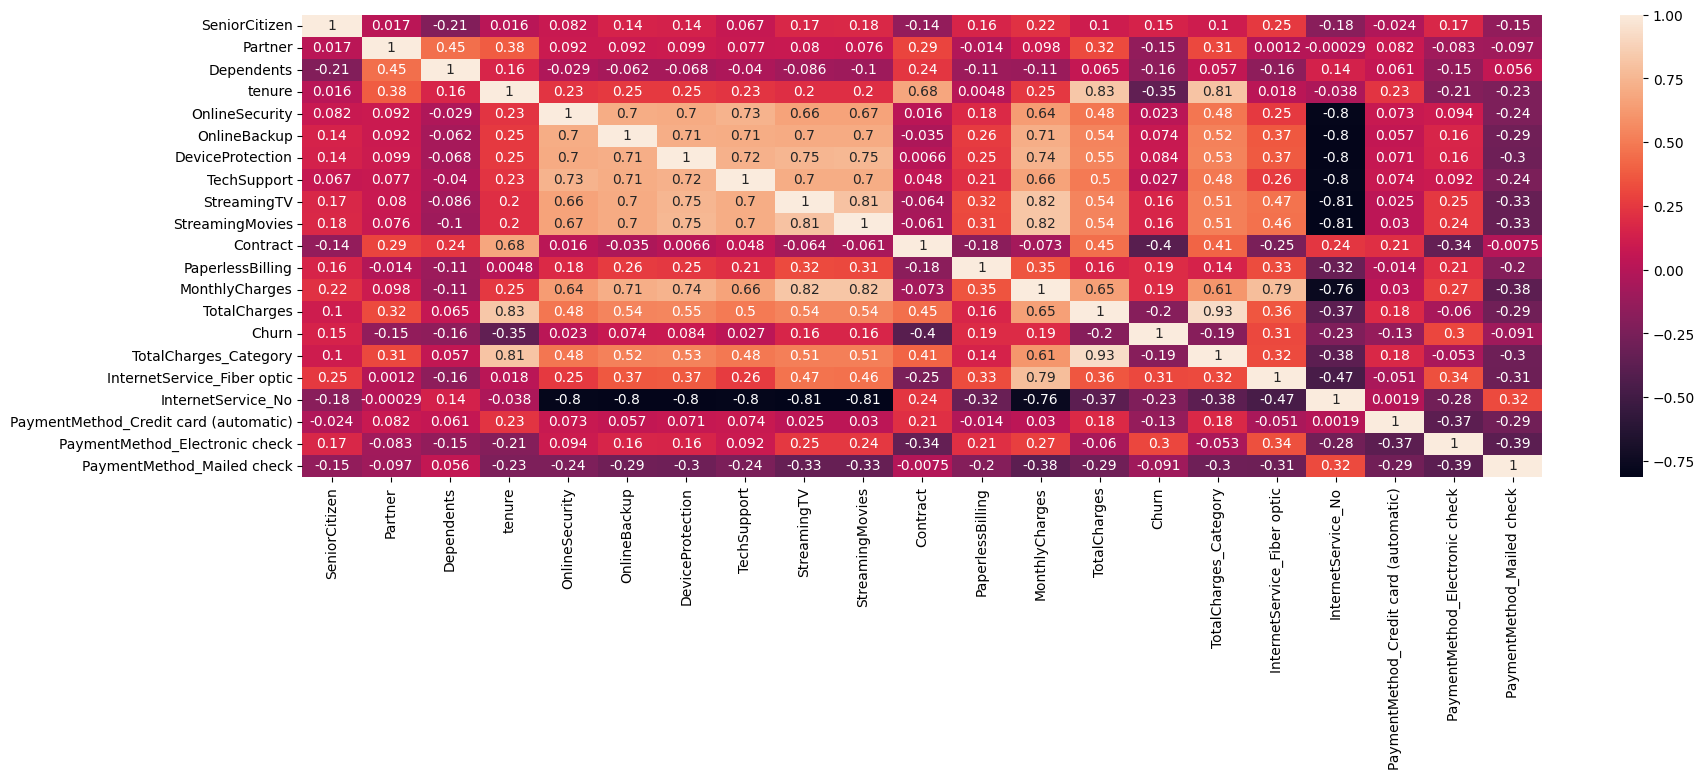

In [4]:
# visualizacao das correlacoes entre as variaveis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
sns.heatmap(dados.corr(numeric_only=True), annot=True)
plt.show()

In [5]:
# separar os dados de teste e treino e treinar o modelo

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression

X = dados.drop(columns=['Churn',
                        'Dependents',
                        'SeniorCitizen',
                        'Partner',
                        'PaperlessBilling',])
y = dados['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
# random forest
forest = RandomForestClassifier(n_estimators=750,
                                max_depth=20,
                                min_samples_split=5,
                                min_samples_leaf=2,
                                class_weight='balanced_subsample',
                                random_state=42)
forest.fit(X, y)
pred_forest = forest.predict(X_test)
pred_train_forest = forest.predict(X_train)

# ridge classifier
Regression = RidgeClassifier(max_iter=1000)
Regression.fit(X, y)
pred_regression = Regression.predict(X_test)
pred_train_regression = Regression.predict(X_train)


Random Forest
---------------------------------------------
Precisao: 0.819971870604782
Acuracia validacao: 0.9319258940112021
Acuracia treino: 0.9267671407344513
Recall: 0.9510603588907015
F1: 0.8806646525679759
F2: 0.9215934239645905
ROC AUC: 0.9380594534500346
[[1580  128]
 [  30  583]]
Validacao Cruzada: 0.77872302781965


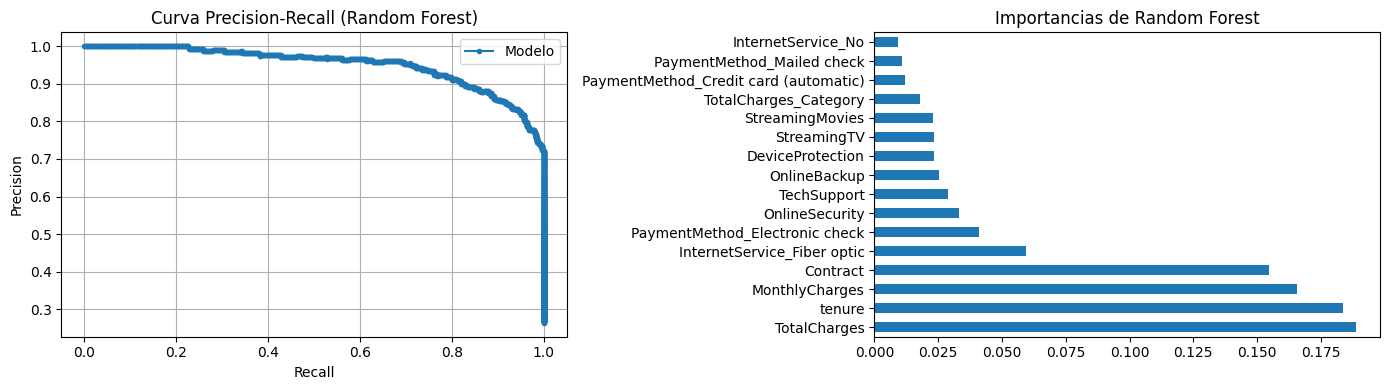

In [7]:
# Avaliando os modelos para a escolha

from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, fbeta_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

print("Random Forest")
print("---------------------------------------------")
print(f'Precisao: {precision_score(y_test, pred_forest)}')
print(f'Acuracia validacao: {accuracy_score(y_test, pred_forest)}')
print(f'Acuracia treino: {accuracy_score(y_train, pred_train_forest)}')
print(f'Recall: {recall_score(y_test, pred_forest)}')
print(f'F1: {f1_score(y_test, pred_forest)}')
print(f'F2: {fbeta_score(y_test, pred_forest, beta=2)}')
print(f'ROC AUC: {roc_auc_score(y_test, pred_forest)}')
print(f'{confusion_matrix(y_test, pred_forest)}')
print(f'Validacao Cruzada: {cross_val_score(forest, X, y, cv=5).mean()}')

y_prob = forest.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

importancias_random = forest.feature_importances_
features = X.columns
feat_random = pd.Series(importancias_random, index=features).sort_values(ascending=False)

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.plot(recall, precision, marker='.', label='Modelo')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Random Forest)')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
feat_random.plot(kind='barh', title='Importancias de Random Forest')

plt.tight_layout()
plt.show()

In [8]:
treshold = 0.5
pred_forest_tresh = (y_prob > treshold).astype(int)

print(classification_report(y_test, pred_forest_tresh))


              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1708
           1       0.82      0.95      0.88       613

    accuracy                           0.93      2321
   macro avg       0.90      0.94      0.92      2321
weighted avg       0.94      0.93      0.93      2321



In [9]:
print("Ridge Classifier")
print("--------------------------------------------------")
print(f'Precisao: {precision_score(y_test, pred_regression)}')
print(f'Acuracia: {accuracy_score(y_test, pred_regression)}')
print(f'Acuracia em treinamento: {accuracy_score(y_train, pred_train_regression)}')
print(f'Recall: {recall_score(y_test, pred_regression)}')
print(f'F1: {f1_score(y_test, pred_regression)}')
print(f'ROC AUC: {roc_auc_score(y_test, pred_regression)}')
print(f'{confusion_matrix(y_test, pred_regression)}')
print(f'Validacao Cruzada: {cross_val_score(Regression, X, y, cv=5).mean()}')

Ridge Classifier
--------------------------------------------------
Precisao: 0.6539325842696629
Acuracia: 0.7949159844894442
Acuracia em treinamento: 0.7981320314158353
Recall: 0.47471451876019577
F1: 0.5500945179584121
ROC AUC: 0.6922752921669831
[[1554  154]
 [ 322  291]]
Validacao Cruzada: 0.7955038867843267


In [10]:
import numpy as np

coef = Regression.coef_[0]
feat = X.columns
importance = pd.DataFrame({'feature': feat,
                           'coefficient': coef,
                           'abs_coef': np.abs(coef),
                           }).sort_values(by='abs_coef', ascending=False)
display(importance)

,feature,coefficient,abs_coef
0,tenure,-0.002806,0.002806
1,OnlineSecurity,-0.002806,0.002806
2,OnlineBackup,-0.002806,0.002806
3,DeviceProtection,-0.002806,0.002806
4,TechSupport,-0.002806,0.002806
5,StreamingTV,-0.002806,0.002806
6,StreamingMovies,-0.002806,0.002806
7,Contract,-0.002806,0.002806
8,MonthlyCharges,-0.002806,0.002806
9,TotalCharges,-0.002806,0.002806


In [190]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint, uniform, loguniform

cv = StratifiedKFold(n_splits=5,  # Numero de dobras
                     shuffle=True,  # embaralhar antes de dividir
                     random_state=42  # semente para reprodutibilidade
                     )

In [ ]:
# ajuste de hiperparametros (RandomizedSearch)

parametros = {'n_estimators': randint(500, 1000),  # numero de arvores na floresta. Mais = melhor (ate certo ponto)
              'max_depth': randint(5, 20),  # profundidade maxima de cada arvore. Balancear, muito baixo pode underfitar e muito alto pode overfitar
              'min_samples_split': randint(2, 5),  # numero minimo de amostras para dividir um no. Quanto maior, menos complexa a arvore 
              'min_samples_leaf': randint(1, 8),  # minimo de amostras em folha. Quanto maior, mais generalizacao
              'max_features': ['sqrt', 'log2', None],  # numero de features consideradas por divisao
              'class_weight': [None, 'balanced']  # ajusta o peso das classes em treinamento. Util para classes desbalanceadas (ex.: 90% nao saem e 10% saem) em caso de churn
              }

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_distributions=parametros,
                                   n_iter=70,
                                   cv=cv,
                                   scoring='f1',
                                   random_state=42,
                                   n_jobs=-1)
random_search.fit(X_train, y_train)

melhores_parametros_randomized = random_search.best_params_
melhores_parametros_randomized

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 6,
 'max_features': 'log2',
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'n_estimators': 841}

In [193]:
print(f'F1 em treinamento: {random_search.best_score_:.2f}')

F1 em treinamento: 0.64


In [159]:
param_ridge = {'alpha': [0.1, 0.5, 1.0],  # regularizacao L2 (maior = mais simples)
               'solver': ['auto', 'saga', 'lsqr', 'cholesky'],  # algoritimo de otimizacao
               'class_weight': [None, 'balanced'],  # balanceamento de classes
               'max_iter': [None, '1000', '5000', '10000'],  # interacoes maximas
               }

ridge_search = RandomizedSearchCV(RidgeClassifier(),
                                   param_distributions=param_ridge,
                                   n_iter=100,
                                   cv=cv,
                                   scoring='f1',
                                   random_state=42,
                                   n_jobs=-1)
ridge_search.fit(X_train, y_train)

melhores_parametros_ridge = ridge_search.best_params_
melhores_parametros_ridge

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
360 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_t

{'solver': 'auto', 'max_iter': None, 'class_weight': 'balanced', 'alpha': 0.1}

In [160]:
print(f'F1 em treinamento: {ridge_search.best_score_:.2f}')

F1 em treinamento: 0.61


In [194]:
# Random Forest
forest_final = RandomForestClassifier(**melhores_parametros_randomized)
forest_final.fit(X, y)
pred_forest_final = forest_final.predict(X_test)

# Ridge Classifier
ridge = RidgeClassifier(**melhores_parametros_ridge)
ridge.fit(X, y)
pred_ridge= ridge.predict(X_test)

In [195]:
print("Random Forest Final")
print("---------------------------------------------")
print(f'Precisao: {precision_score(y_test, pred_forest_final)}')
print(f'Recall: {recall_score(y_test, pred_forest_final)}')
print(f'F1: {f1_score(y_test, pred_forest_final)}')
print(f'ROC AUC: {roc_auc_score(y_test, pred_forest_final)}')
print(f'{confusion_matrix(y_test, pred_forest_final)}')
print(f'Validacao Cruzada: {cross_val_score(forest_final, X, y, cv=cv).mean()}')

Random Forest Final
---------------------------------------------
Precisao: 0.5402792696025779
Recall: 0.8086816720257235
F1: 0.6477784932388925
ROC AUC: 0.7783843910452336
[[1271  428]
 [ 119  503]]
Validacao Cruzada: 0.7559730305998962


In [163]:
print("RidgeClassifier")
print("---------------------------------------------")
print(f'Precisao: {precision_score(y_test, pred_ridge)}')
print(f'Recall: {recall_score(y_test, pred_ridge)}')
print(f'F1: {f1_score(y_test, pred_ridge)}')
print(f'ROC AUC: {roc_auc_score(y_test, pred_ridge)}')
print(f'{confusion_matrix(y_test, pred_ridge)}')
print(f'Validacao Cruzada: {cross_val_score(ridge, X, y, cv=cv).mean()}')

RidgeClassifier
---------------------------------------------
Precisao: 0.5249237029501526
Recall: 0.8203497615262321
F1: 0.6401985111662531
ROC AUC: 0.7721725166969222
[[1225  467]
 [ 113  516]]
Validacao Cruzada: 0.7386222716937564


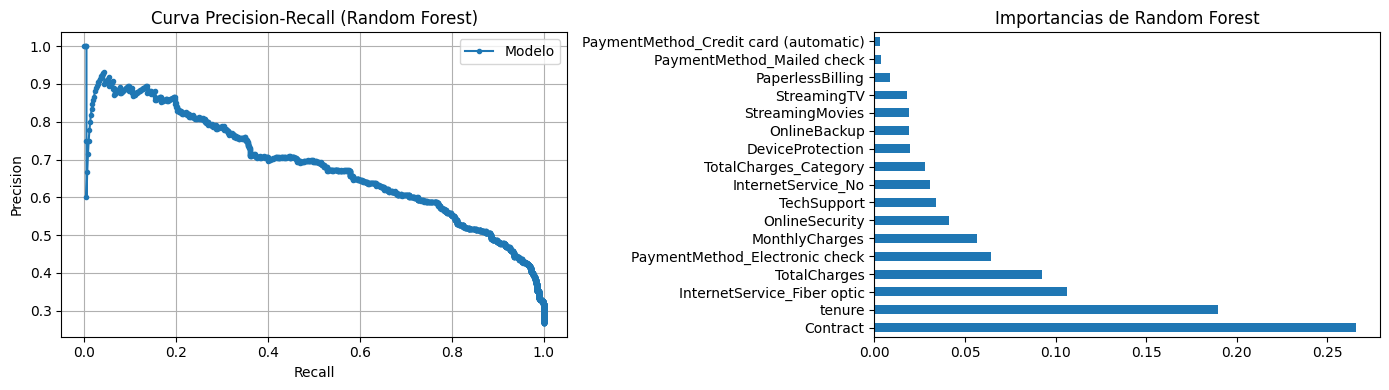

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

y_prob = forest_final.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_prob)

importancias_random = forest_final.feature_importances_
features = X.columns
feat_random = pd.Series(importancias_random, index=features).sort_values(ascending=False)

plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.plot(recall, precision, marker='.', label='Modelo')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Random Forest)')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
feat_random.plot(kind='barh', title='Importancias de Random Forest')

plt.tight_layout()
plt.show()

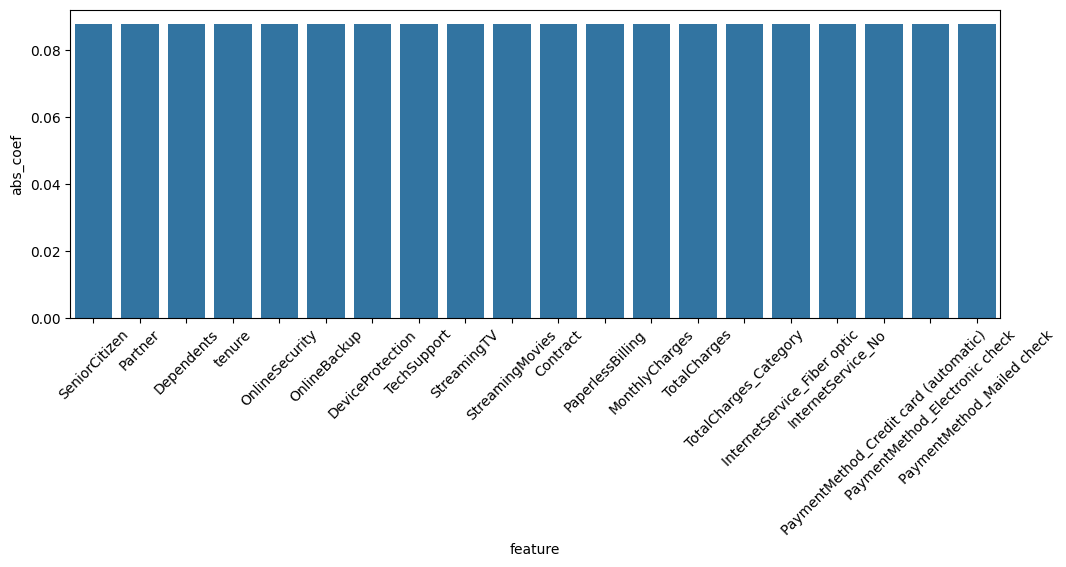

In [166]:
coef2 = ridge.coef_[0]
feat2 = X.columns
importance2 = pd.DataFrame({'feature': feat2,
                           'coefficient': coef2,
                           'abs_coef': np.abs(coef2),
                           }).sort_values(by='abs_coef', ascending=False)

plt.figure(figsize=(12,4))
sns.barplot(importance2, x='feature', y='abs_coef')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# De inicio o modelo random forest teve overfitting, me levando a testar a regressao logistica, mas a regressao logistica apresentou um desempenho muito baixo.
# Apos esses resultados, recorri ao ajuste de hiperparametros, e mudei para um modelo mais avancado de regressao logistica (ridge classifier), mas os ajustes
# nao davam resultado, so pioravam ainda mais o modelo.
# Entao peguei o random forest e ajustei manualmente, testando hipoteses de parametros, removendo features que causavam ruido e vendo como se comportava.
# O objetivo foi obter um recall alto, pois e melhor identificar os que vao sair (errar menos nesses clientes). Ao obter o recall alto, fui ajustando para aumentar a precisao
# tambem que e essencial.
# Com isso achei os melhores parametros que se ajustam bem ao problema de negocio

In [ ]:
# salvando o melhor modelo
import pickle
from joblib import dump

# with open("forest_treinado.pkl", "wb") as f:
#     pickle.dump(forest, f)

dump(forest, 'modelo_forest_comprimido.joblib', compress=7) # o modelo teve que ser comprimido para colocar no github

['modelo_forest_comprimido.joblib']